# Dynamical Systems

Broadly, a rule describing how some variables evolve in time. 

* Discrete time -> Map: $\vec u_{n+1} = \vec f (\vec u_n, p, n) $ 


* Continuous time -> ODE: $ \frac{d\vec u}{dt} = \vec f (\vec u, p, t) $

where $\vec u$ is the state of the system


In DifferentialEquations.jl, the DynamicalSystem struct contains the information of a dynamical system:

1. Equations of motion function $\vec f$
2. Initial state
3. Parameter container (if applicable)
4. Jacobian

### Henon Map: a simple (discrete) chaotic system

$$x_{n+1} = 1 - ax_{n}^{2} + y_n $$
$$y_{n+1} = bx_n $$

In [2]:
using DynamicalSystems
using PyPlot

In [65]:
# definition
h_eom(x,p,t) = SVector{2}(1.0 - p[1]*x[1]^2 + x[2], p[2]*x[1])
# state
state = zeros(2)
# parameters
p = [1.2, 0.4]
# system
henon = DiscreteDynamicalSystem(h_eom, state, p)

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      h_eom
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.2, 0.4]

In [66]:
tr = trajectory(henon, 10000);
# different starting point 
tr2 = trajectory(henon, 10000, 0.01rand(2));

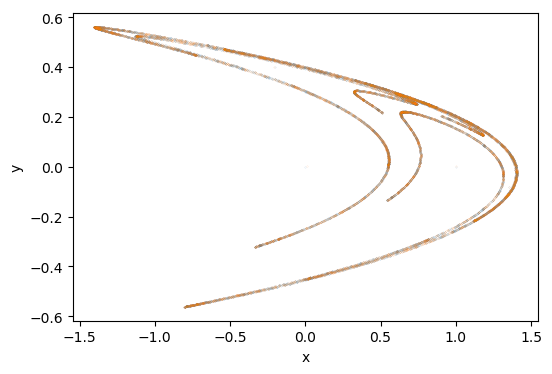

PyObject Text(24,0.5,'y')

In [67]:
figure(figsize=(6,4))
plot(tr[:,1], tr[:,2], lw=0.0, marker="o", ms=0.1, alpha=0.5)
plot(tr2[:,1], tr2[:,2], lw=0.0, marker="o", ms=0.1, alpha=0.5)
xlabel("x"); ylabel("y")

trajectory returns a **Dataset**:

In [13]:
summary(tr)

"2-dimensional Dataset{Float64} with 10001 points"

### Adding a Jacobian

If not provided, a Jacobian will be computed using ForwardDiff. However, preformance is even better if you provide one:

In [20]:
h_jacobian(x, p, t) = @SMatrix [-2*p[1]*x[1] 1.0; p[2] 0.0]

h_jacobian (generic function with 1 method)

In [21]:
henon_with_jac = DiscreteDynamicalSystem(h_eom, state, p, h_jacobian)

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      h_eom
 in-place?    false
 jacobian:    h_jacobian
 parameters:  [1.4, 0.3]

In [26]:
using BenchmarkTools
a = rand(SVector{2});
@btime $(henon_with_jac.jacobian)($a, $henon.p, 0);
@btime $(henon.jacobian)($a, $henon.p, 0);

  2.188 ns (0 allocations: 0 bytes)
  2.917 ns (0 allocations: 0 bytes)


## Continuous Systems

in-place Henon-heiles system (no parameters)

In [90]:
function hheom!(du, u, p, t)
    du[1] = u[3]
    du[2] = u[4]
    du[3] = -u[1] - 2u[1]*u[2]
    du[4] = -u[2] - (u[1]^2 - u[2]^2)
    return nothing
end

hh = ContinuousDynamicalSystem(hheom!, [0, -0.25, -0.42081, 0], nothing)

4-dimensional continuous dynamical system
 state:       [0.0, -0.25, -0.42081, 0.0]
 e.o.m.:      hheom!
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  nothing

In [91]:
tr = trajectory(hh, 100.0, dt=0.05);

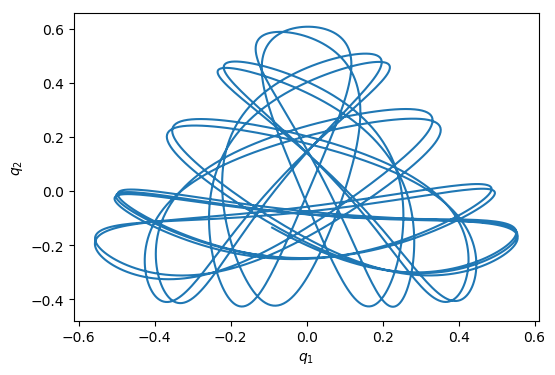

PyObject Text(25,0.5,'$q_2$')

In [92]:
figure(figsize=(6,4))
plot(tr[:,1], tr[:,2]);
xlabel("\$q_1\$"); ylabel("\$q_2\$")